In [3]:
import numpy as np
import matplotlib.pyplot as plt

colors = [
    "#648FFF",
    "#785EF0",
    "#DC267F",
    "#FE6100",
    "#FFB000"
]

In [4]:
def plot_greyscale_matrix(A):
    plt.figure(figsize=(5, 5))
    plt.imshow(A, cmap="gray")
    plt.axis('off')
    plt.show()

In [5]:
def random_orthogonal_matrix(m, n):
    """
    A random orthogonal matrix from an uniform 
    distribution (distribution given by Haar measure).
    """
    Omega = np.random.randn(m, n)
    Q, R = np.linalg.qr(Omega)
    return Q * np.sign(np.diag(R))


def exp_decay(n, C, alpha):
    """
    Generate an exponentially decaying sequence x_k = C * exp(-alpha * k).
    """
    k = np.arange(n)
    return C * np.exp(-alpha * k)


def poly_decay(n, C, p, alpha):
    """
    Generate a polynomial decaying sequence x_k = C / (1 + alpha * k)^p.
    """
    k = np.arange(n)
    return C / (1 + alpha * k) ** p

In [6]:
# Construct matrices with a given singular
n = 500
C = 10
p = 2
alphas = np.array([0.001, 0.01, 0.1])

Ss = [exp_decay(n, C, alpha) for alpha in alphas]
Ss = [poly_decay(n, C, p, alpha) for alpha in alphas]

As = []
for S in Ss:
    U = random_orthogonal_matrix(n, n)
    V = random_orthogonal_matrix(n, n)
    A = U @ np.diag(S) @ V.T
    As.append(A)

for A in As:
    cond = np.linalg.cond(A)
    print(f"cond(A) = {cond:.2f}")

cond(A) = 2.25
cond(A) = 35.88
cond(A) = 2590.81


In [8]:
from randomizedSVD import rsvd

In [18]:
Bs = []
for A in As:
    U, S, Vt = rsvd(A, 200, 10)
    Bs.append(S)

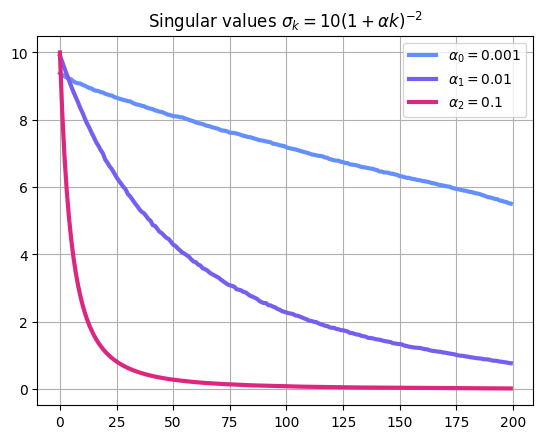

In [19]:
fig, ax = plt.subplots(1, 1)

for i in range(len(Ss)):
    ax.plot(np.arange(len(Bs[i])), Bs[i], c=colors[i], lw=3, label=f'$\\alpha_{i}={alphas[i]}$')
    #ax.plot(np.arange(n), Ss[i], '-', c=colors[i], ms=1, alpha=1)


ax.grid(visible=True)
ax.set_title(f"Singular values $\\sigma_k = {C}(1+\\alpha k)^{{-{p}}}$")
ax.legend()
plt.show()

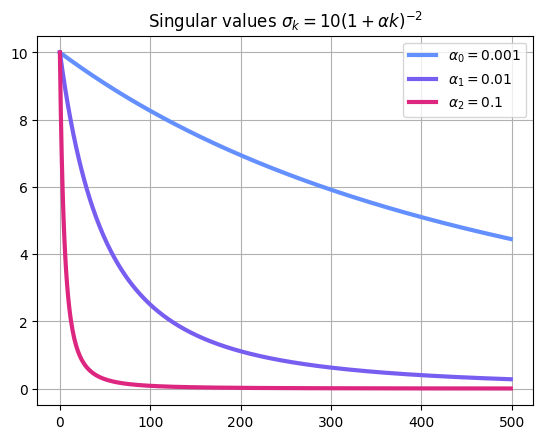

In [327]:
fig, ax = plt.subplots(1, 1)

for i in range(len(Ss)):
    ax.plot(np.arange(n), Ss[i], c=colors[i], lw=3, label=f'$\\alpha_{i}={alphas[i]}$')
    #ax.plot(np.arange(n), Ss[i], '-', c=colors[i], ms=1, alpha=1)


ax.grid(visible=True)
ax.set_title(f"Singular values $\\sigma_k = {C}(1+\\alpha k)^{{-{p}}}$")
ax.legend()
plt.show()